In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as mplot
import math

mplot.rcParams['figure.figsize'] = [45*0.2, 30*0.2]
mplot.rc('xtick', labelsize=20) 
mplot.rc('ytick', labelsize=20) 

In [2]:
def pol2cart(r,th):
 x = r*np.cos(th)
 y = r*np.sin(th) 
 return(x,y)

def cart2pol(x_in,y_in):
 r_out = np.sqrt(x_in**2+y_in**2)
 th_out = np.arctan2(y_in,x_in)
 return(r_out,th_out)

def create_source(Strength,X_in,Y_in):
 
 #Calculate radius and angle for each given X and Y
 R,TH = cart2pol(X_in,Y_in)

 #Calculate vector field components in polar coordinates
 Ur = Strength/(2*3.14*R)
 Uth = Ur*0;
    
 #Calculate vector components in cartesian coordinates
 Ux = Ur*np.cos(TH) - Uth*np.sin(TH)
 Vy = Ur*np.sin(TH) + Uth*np.cos(TH)

 return (Ux,Vy)

In [80]:
N = 1000;
x_start = -1;
x_end = 6;
y_start = -3;
y_end = 3;

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)

X, Y = np.meshgrid(x,y)

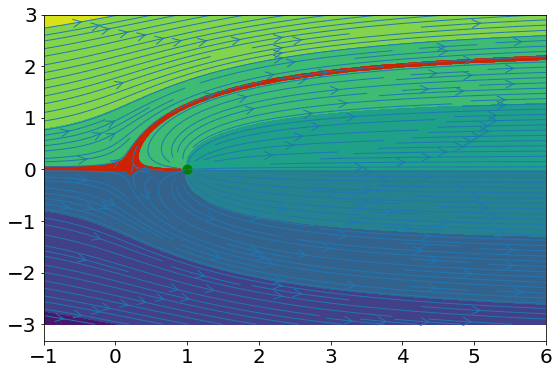

In [106]:
Uinf = 1
sigma = 5

x_source = 1
y_source = 0

x_sink = 2
y_sink = 0

U_free = np.ones((N,N),float)*Uinf;
V_free = np.zeros((N,N),float)

U_source, V_source = create_source(sigma,X - x_source,Y - y_source)
U_sink, V_sink = create_source(-sigma,X - x_sink ,Y - y_sink)

U = U_free + U_source
V = V_free + V_source

tol = 0.01;
ind = (np.abs(U)<tol)&(np.abs(V)<tol);

X_stag = np.mean(X[ind]);
Y_stag = np.mean(Y[ind]+0.1);

Psi = Uinf*Y + sigma*np.arctan2((Y-y_source),(X-x_source))/(2*np.pi);
Psi_stag = Uinf*Y_stag + sigma*np.arctan2((Y_stag-y_source),(X_stag-x_source))/(2*np.pi);

ind_stream = abs(Psi-Psi_stag)<0.025;

mplot.contourf(X,Y,Psi)
mplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
mplot.scatter(1, 0, color='g', s=80, marker='o')
mplot.scatter(X[ind],Y[ind], color='#CD2305', s=50, marker='o')
mplot.scatter(X[ind_stream],Y[ind_stream], color='#CD2305', s=1, marker='o')

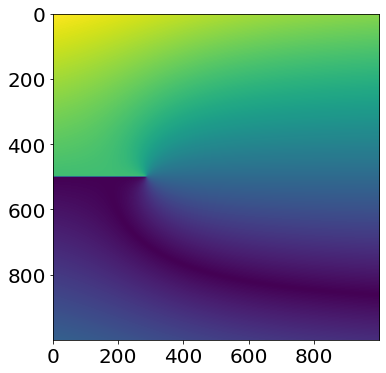

In [102]:
#mplot.imshow(Psi)
#mplot.contourf(Psi)

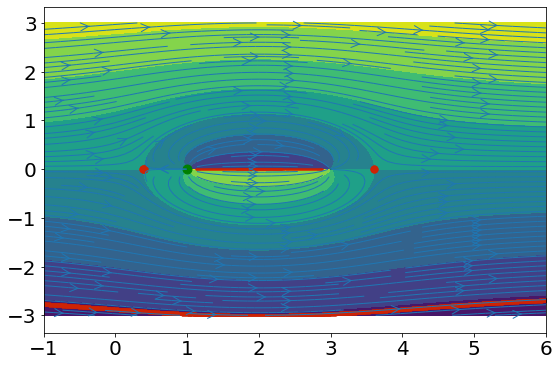

In [87]:
Uinf = 1
sigma = 5

x_source = 1
y_source = 0

x_sink = 3
y_sink = 0

U_free = np.ones((N,N),float)*Uinf;
V_free = np.zeros((N,N),float)

U_source, V_source = create_source(sigma,X - x_source,Y - y_source)
U_sink, V_sink = create_source(-sigma,X - x_sink ,Y - y_sink)

U = U_free + U_source + U_sink
V = V_free + V_source + V_sink

tol = 0.01;
ind = (np.abs(U)<tol)&(np.abs(V)<tol);

X_stag = np.mean(X[ind]);
Y_stag = np.mean(Y[ind]);

Psi = Uinf*Y + sigma*np.arctan2((Y-y_source),(X-x_source))/(2*np.pi) - sigma*np.arctan2((Y-y_sink),(X-x_sink))/(2*np.pi) ;
Psi_stag = Uinf*Y_stag + sigma*np.arctan2((Y_stag-y_source),(X_stag-x_source))/(2*np.pi) -  sigma*np.arctan2((Y_stag-y_sink),(X_stag-x_sink))/(2*np.pi) ;

ind_stream = abs(Psi-Psi_stag)<0.025;

mplot.contourf(X,Y,Psi)
mplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
mplot.scatter(1, 0, color='g', s=80, marker='o')
mplot.scatter(X[ind],Y[ind], color='#CD2305', s=50, marker='o')
mplot.scatter(X[ind_stream],Y[ind_stream], color='#CD2305', s=1, marker='o')
#mplot.contour(X, Y, Psi)
